Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Ahmad Mongy Saad"
ID   = "120200033"
Section = "CSE01"

---

# CSE 213 Numerical Analysis
# Lab 2 - Solution of Nonlinear Equations in One Variable - Bisection Method

It is required to solve the equation:
$ x - \cos(x)-1 = 0$
, using the bisection method in Python.

Start with the interval $[0, \pi/2]$ and obtain the solution with an error $\epsilon$ less than $10^{-5}$, where $\epsilon = |b_n - a_n|/2$ and $|p_n - p| \leq \epsilon$.

### The Bisection Algorithm

Given a function `eq` which we want to solve, the interval `[a,b]` in which the solution exists and a tolerance `tol` which our algorithm should stop when the error is smaller than it, the Bisection Algorithm follows the following pseudocode:
``` python
fa = eq(a)
fb = eq(b)
while | a - b | / 2 > tol
    solution = (a + b) / 2
    f_solution = eq(solution)
    if fa * f_solution <= 0
        b = solution
    else
        a = solution
```

### Define a function `eq1` for the given equation

In [ ]:
import numpy as np
def eq1(x):
    return(x-np.cos(x)-1)
    raise NotImplementedError()

In [ ]:
### BEGIN TEST
x = np.array([0, 1, 2])
assert np.all(np.isclose(eq1(x), np.array([-2.0, -0.5403023058681398, 1.4161468365471426])))
### END TEST

### Implement the bisection function to solve the equation `eq1` using the bisection method.

In [ ]:
def bisection(equation, a=0, b=np.pi/2, tolerance=1e-5):
    """
    equation (function): a function that we want to solve
    a (float): the starting point of the solution interval
    b (float): the end point of the solution interval
    tolerance (float): the value after which we stop iterating
    """
    fa=equation(a)
    fb=equation(b)
    while abs(a-b)/2 > tolerance:
      solution = (a+b)/2
      f_solution = equation(solution)
      if fa*f_solution <=0 :
        b =solution
      else:
        a=solution
    return((a+b)/2)
    # YOUR CODE HERE
    raise NotImplementedError()

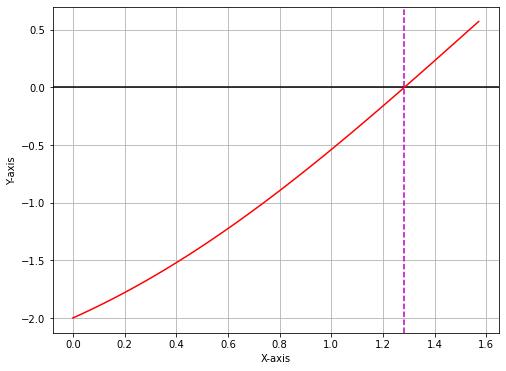

In [ ]:
### BEGIN TEST
from matplotlib import pyplot as plt
p = bisection(eq1, 0, np.pi/2, 1e-5)
assert p == 1.283432589901804
plt.figure(figsize=(8,6))
plt.grid()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(y=0, color='k')
plt.axvline(x=p, color='m', linestyle='--')
x = np.linspace(0, np.pi/2, 50)
y = eq1(x)
plt.plot(x, y, 'r')
plt.show()
### END TEST

Modify the `bisection` function to print the results as in the following table.
```
+-----+--------------------+--------------------+--------------------+------+--------------------+
| It# |         a          |         b          |         p          | f(a) |        f(b)        |
+-----+--------------------+--------------------+--------------------+------+--------------------+
|  1  |         0          |        1.25        |       0.625        | 3.0  | 1.6824939607034732 |
|  2  |       0.625        |        1.25        |       0.9375       | 3.0  | 1.6824939607034732 |
|  3  |       0.625        |       0.9375       |      0.78125       | 3.0  | 1.6824939607034732 |
|  4  |      0.78125       |       0.9375       |      0.859375      | 3.0  | 1.6824939607034732 |
|  5  |      0.859375      |       0.9375       |     0.8984375      | 3.0  | 1.6824939607034732 |
|  6  |      0.859375      |     0.8984375      |     0.87890625     | 3.0  | 1.6824939607034732 |
|  7  |     0.87890625     |     0.8984375      |    0.888671875     | 3.0  | 1.6824939607034732 |
|  8  |     0.87890625     |    0.888671875     |    0.8837890625    | 3.0  | 1.6824939607034732 |
|  9  |    0.8837890625    |    0.888671875     |   0.88623046875    | 3.0  | 1.6824939607034732 |
|  10 |    0.8837890625    |   0.88623046875    |   0.885009765625   | 3.0  | 1.6824939607034732 |
|  11 |    0.8837890625    |   0.885009765625   |  0.8843994140625   | 3.0  | 1.6824939607034732 |
|  12 |    0.8837890625    |  0.8843994140625   |  0.88409423828125  | 3.0  | 1.6824939607034732 |
|  13 |  0.88409423828125  |  0.8843994140625   | 0.884246826171875  | 3.0  | 1.6824939607034732 |
|  14 |  0.88409423828125  | 0.884246826171875  | 0.8841705322265625 | 3.0  | 1.6824939607034732 |
|  15 | 0.8841705322265625 | 0.884246826171875  | 0.8842086791992188 | 3.0  | 1.6824939607034732 |
|  16 | 0.8842086791992188 | 0.884246826171875  | 0.8842277526855469 | 3.0  | 1.6824939607034732 |
|  17 | 0.8842086791992188 | 0.8842277526855469 | 0.8842182159423828 | 3.0  | 1.6824939607034732 |
+-----+--------------------+--------------------+--------------------+------+--------------------+
```
However, add another column `abs(pn - pn_1)/pn` which shows the value $abs(p_n - p_{n-1})/p_n)$.

`prettytable` is a small library that let you print tables in nice formatting easily.

You should
First install prettytable by running the following cell:

In [ ]:
!pip install prettytable

In [ ]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['It#', 'a', 'b', 'p', 'f(a)', 'f(b)', 'abs(pn-pn_1)/pn']
# Add rows to the table using table.add_row([<values>]). Replace values with the columns at the added row.
def bisection(equation, a=0, b=np.pi/2, tolerance=1e-5):
    """
    equation (function): a function that we want to solve
    a (float): the starting point of the solution interval
    b (float): the end point of the solution interval
    tolerance (float): the value after which we stop iterating
    """
    table = PrettyTable()
    table.field_names = ['It#', 'a', 'b', 'p', 'f(a)', 'f(b)', 'abs(pn-pn_1)/pn']
    fa=equation(a)
    fb=equation(b)
    it = 0
    while abs(a-b)/2 > tolerance:
      it+=1
      solution = (a+b)/2
      f_solution = equation(solution)
      table.add_row([it,a,b,(a+b)/2, fa,fb,2*abs(a+b/2 -solution)/(a+b)])
      if fa*f_solution <=0 :
        b =solution
      else:
        a=solution
    print(table)
    return((a+b)/2)
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
### BEGIN TEST
p = bisection(eq1, 0, 2.5, 1e-5)
### END TEST

+-----+-------------------+--------------------+--------------------+------+--------------------+---------------------+
| It# |         a         |         b          |         p          | f(a) |        f(b)        |   abs(pn-pn_1)/pn   |
+-----+-------------------+--------------------+--------------------+------+--------------------+---------------------+
|  1  |         0         |        2.5         |        1.25        | -2.0 | 2.3011436155469336 |         0.0         |
|  2  |        1.25       |        2.5         |       1.875        | -2.0 | 2.3011436155469336 |  0.3333333333333333 |
|  3  |        1.25       |       1.875        |       1.5625       | -2.0 | 2.3011436155469336 |         0.4         |
|  4  |        1.25       |       1.5625       |      1.40625       | -2.0 | 2.3011436155469336 |  0.4444444444444444 |
|  5  |        1.25       |      1.40625       |      1.328125      | -2.0 | 2.3011436155469336 | 0.47058823529411764 |
|  6  |        1.25       |      1.32812

Define a function `eq2` to ﬁnd the positive solutions of the equation $f(x) = e^x - 5x + 2$ in the interval 
$[0.1, 1]$ by the bisection method.

Convince yourself that the solutions seems accurate from the plot of $f(x) = e^x - 5x + 2$  in the range $[0.0, 2.5]$.

In [ ]:
def eq2(x):
    # YOUR CODE HERE
    return((np.e)**x - 5*x +2)
    raise NotImplementedError()

+-----+--------------------+-------------------+--------------------+------+--------------------+---------------------+
| It# |         a          |         b         |         p          | f(a) |        f(b)        |   abs(pn-pn_1)/pn   |
+-----+--------------------+-------------------+--------------------+------+--------------------+---------------------+
|  1  |         0          |        2.5        |        1.25        | 3.0  | 1.6824939607034715 |         0.0         |
|  2  |         0          |        1.25       |       0.625        | 3.0  | 1.6824939607034715 |         0.0         |
|  3  |       0.625        |        1.25       |       0.9375       | 3.0  | 1.6824939607034715 |  0.3333333333333333 |
|  4  |       0.625        |       0.9375      |      0.78125       | 3.0  | 1.6824939607034715 |         0.4         |
|  5  |      0.78125       |       0.9375      |      0.859375      | 3.0  | 1.6824939607034715 | 0.45454545454545453 |
|  6  |      0.859375      |       0.937

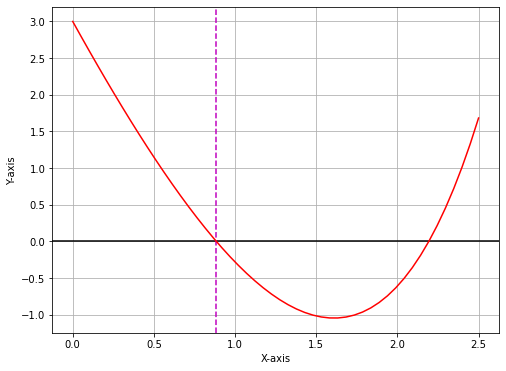

In [ ]:
### BEGIN TEST
p = bisection(eq2, 0, 2.5, 1e-5)
assert p == 0.8842182159423828
plt.figure(figsize=(8,6))
plt.grid()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(y=0, color='k')
plt.axvline(x=p, color='m', linestyle='--')
x = np.linspace(0, 2.5, 50)
y = eq2(x)
plt.plot(x, y, 'r')
plt.show()
### END TEST

**THANK YOU**